# Example notebook

In [20]:
%matplotlib notebook

In [21]:
import os

In [22]:
from buses import *

We will use example data. They were collected for twenty minutes in the morning on 3rd February 2021.

We will also provide profiling results.

In [23]:
import cProfile
pr = cProfile.Profile()
pr.enable()

Now, let's start analysing the data.

In [24]:
dataset = load_from_files(os.getcwd()+"/data", "data")

Here we load locations of bus stops from file, but it can be loaded from https://api.um.warszawa.pl/ as well.

In [25]:
locations_dataset = load_bus_stops_from_file(os.getcwd()+"/data", "bus_stops_0.txt")

In [26]:
pd.options.mode.chained_assignment = None

Let's see the buses that exceeded 50 km/h...

In [27]:
exceeding = all_exceeding_50(dataset)

In [28]:
all_exceeding_50(dataset)

,Lines,Lon,VehicleNumber,Time,Lat,Brigade,Velocity
432,714,20.818045,4225.0,2021-02-03 08:44:35,52.267178,2,56.185452
663,511,20.955046,5974.0,2021-02-03 08:44:32,52.308517,1,67.794643
734,713,20.752647,7205.0,2021-02-03 08:44:35,52.211533,05,51.030523
867,501,21.045956,8155.0,2021-02-03 08:44:35,52.191240,1,70.709545
944,514,21.204646,8327.0,2021-02-03 08:44:35,52.247416,2,57.981970
...,...,...,...,...,...,...,...
472,156,20.991380,4414.0,2021-02-03 09:05:42,52.285426,5,70.210792
624,162,21.053249,5927.0,2021-02-03 09:05:41,52.198338,016,56.625717
902,523,20.960213,8211.0,2021-02-03 09:05:44,52.218164,1,53.724714
1081,402,21.093010,8588.0,2021-02-03 09:05:38,52.214852,2,59.054572


How many such buses do we have?

In [29]:
how_many_exceeded_50(dataset)

147

Let's plot them on the map.

<IPython.core.display.Javascript object>


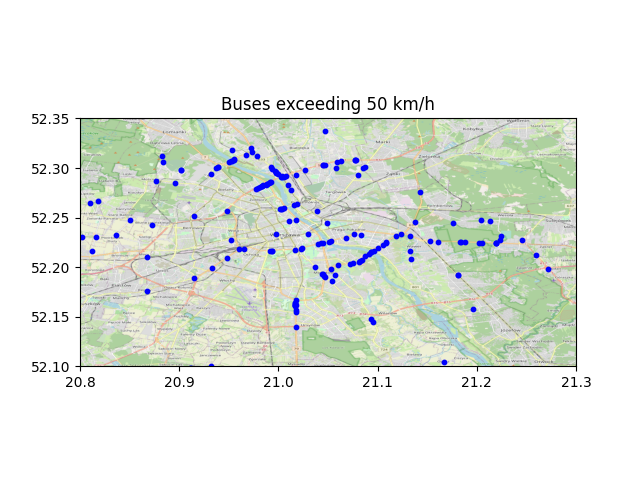

In [30]:
plot_on_map(exceeding, 'Buses exceeding 50 km/h')

And here we can see all the buses from the dataset:

<IPython.core.display.Javascript object>


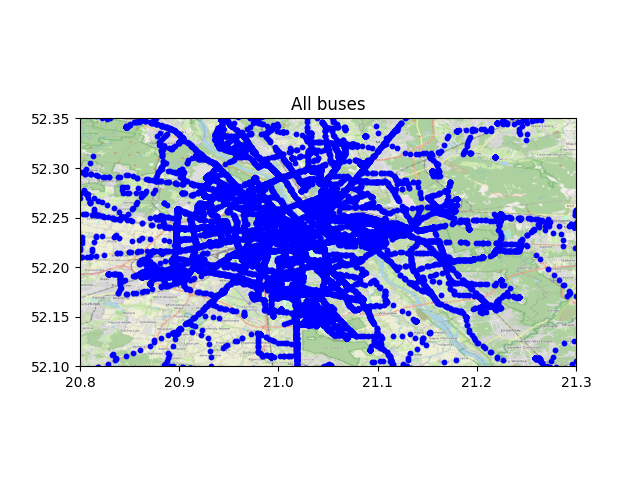

In [31]:
merged = pd.DataFrame({"Lines": [], "Lon": [], "VehicleNumber": [], "Time": [], "Lat": [], "Brigade": []})
for i in range(len(dataset)):
    merged = pd.concat([merged, dataset[i]])
plot_on_map(merged,"All buses")

Now we would like to check percentage of buses exceeding 50 km/h in some regions.

In [32]:
help(percentage_exceeding_50)

Help on function percentage_exceeding_50 in module buses:

percentage_exceeding_50(dataset, place_lat, place_lon, radius)
    Returns percentage of buses exceeding 50 km/h near some place for the given dataset. By 'near' we understand in a circle with its center in the given location and with given radius.
    :param dataset: List of pandas.DataFrames, each corresponding to one moment of time. Each of these dataframes should have columns: "Lines", "Lon", "VehicleNumber", "Time", "Lat", "Brigade".
    :param place_lat: latitude of the place of interest (numeric).
    :param place_lon: longitude of the place of interest (numeric).
    :param radius: radius of circle around the place (numeric).
    :return: percentage of buses exceeding 50 km/h.



In [33]:
percentage_exceeding_50(dataset, 52.21, 21.1, 1)

0.22727272727272727

In [34]:
percentage_exceeding_50(dataset, 52.30, 21.0, 1)

0.14893617021276595

And now, let's check how punctual the buses on our chosen bus stop are.

In [35]:
help(is_on_time)

Help on function is_on_time in module buses:

is_on_time(dataset, locations_dataset, bus_stop_name, bus_stop_number, line, api_key, verbose=True)
    :param dataset: List of pandas.DataFrames, each corresponding to one moment of time. Each of these dataframes should have columns: "Lines", "Lon", "VehicleNumber", "Time", "Lat", "Brigade".
    :param locations_dataset: pandas.DataFrame containing locations of bus stops. Columns: "zespol", "slupek", "nazwa_zespolu", "id_ulicy", "szer_geo", "dlug_geo", "kierunek".
    :param bus_stop_name: Name of the bus stop given, for example: "Marszałkowska".
    :param bus_stop_number: Number of the bus stop given as string, for example "01".
    :param line: Number of line, for example 520.
    :param api_key: personal api key.
    :param verbose: If True, additional information about number of all buses and number of punctual buses will be printed. Default is True.
    :return: Fraction of buses that were on time for the given dataset, line and bus 

In [36]:
is_on_time(dataset, locations_dataset, "Marszałkowska", "01", 520, api_key='b2b6deb9-bb03-4279-b25d-55fa1bb97690')

There should be 2 such bus(es) according to schedule in the analysed time period. 2 of them was/were on time.
Fraction of punctual buses for the given bus stop and line: 


1.0

In [37]:
is_on_time(dataset, locations_dataset, "Marszałkowska", "01", 521, api_key='b2b6deb9-bb03-4279-b25d-55fa1bb97690')

The input data is not correct! This line does not run in this region. /Your api key is not correct.


In [38]:
pr.disable()
 
pr.print_stats(sort='time')

         74042411 function calls (73583396 primitive calls) in 58.773 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 15359605    6.919    0.000    6.919    0.000 geomath.py:106(polyval)
   197055    4.165    0.000   27.683    0.000 geodesic.py:704(_GenInverse)
   197055    2.478    0.000    4.285    0.000 geodesic.py:366(_C4coeff)
   282063    2.418    0.000   13.490    0.000 geodesic.py:627(_Lambda12)
   197055    2.305    0.000   13.135    0.000 geodesic.py:274(__init__)
   197055    2.296    0.000    3.881    0.000 geodesic.py:339(_C3coeff)
   478363    2.269    0.000   10.040    0.000 geodesic.py:429(_Lengths)
  1540262    2.200    0.000    2.378    0.000 geodesic.py:121(_SinCosSeries)
   478363    1.913    0.000    3.072    0.000 geodesic.py:204(_C1f)
   591165    1.642    0.000    2.913    0.000 geomath.py:161(sincosd)
788220/394110    1.214    0.000    4.077    0.000 point.py:154(__new__)
   197055    1.172    0.00

      448    0.005    0.000    0.009    0.000 indexers.py:173(maybe_convert_indices)
     7256    0.005    0.000    0.008    0.000 concat.py:401(<genexpr>)
     1399    0.005    0.000    0.211    0.000 base.py:544(_shallow_copy_with_infer)
     1520    0.005    0.000    0.011    0.000 generic.py:1606(_check_label_or_level_ambiguity)
     1112    0.005    0.000    0.037    0.000 {built-in method builtins.sorted}
     4791    0.005    0.000    0.060    0.000 common.py:1282(needs_i8_conversion)
      380    0.005    0.000    0.494    0.001 generic.py:932(rename)
      828    0.005    0.000    0.354    0.000 managers.py:1224(reindex_indexer)
      591    0.005    0.000    0.251    0.000 generic.py:4299(reindex)
      448    0.005    0.000    0.518    0.001 generic.py:3300(take)
     4874    0.005    0.000    0.013    0.000 base.py:505(_get_attributes_dict)
    10086    0.005    0.000    0.005    0.000 {built-in method pandas._libs.missing.checknull}
     5693    0.005    0.000    0.039    

     1253    0.002    0.000    0.006    0.000 blocks.py:2597(is_bool)
      140    0.002    0.000    0.003    0.000 __init__.py:1663(normalize_kwargs)
     2334    0.002    0.000    0.014    0.000 config.py:101(_get_option)
     1608    0.002    0.000    0.009    0.000 construction.py:570(is_empty_data)
     1283    0.002    0.000    0.010    0.000 series.py:515(array)
      667    0.002    0.000    0.236    0.000 base.py:4488(get_indexer_for)
      230    0.002    0.000    0.002    0.000 blocks.py:368(set)
      994    0.002    0.000    0.015    0.000 range.py:387(_shallow_copy)
  584/489    0.002    0.000    0.159    0.000 common.py:49(new_method)
      380    0.002    0.000    0.124    0.000 managers.py:1941(_transform_index)
      667    0.002    0.000    0.004    0.000 managers.py:1970(_preprocess_slice_or_indexer)
      380    0.002    0.000    0.396    0.001 generic.py:3907(drop)
     4673    0.002    0.000    0.002    0.000 config.py:566(_get_deprecated_option)
     2660    0.0

      474    0.001    0.000    0.002    0.000 base.py:4019(<listcomp>)
      388    0.001    0.000    0.025    0.000 session.py:81(<lambda>)
     1893    0.001    0.000    0.001    0.000 {method 'upper' of 'str' objects}
       95    0.001    0.000    0.008    0.000 timedeltas.py:139(__new__)
     2091    0.001    0.000    0.001    0.000 concat.py:105(<genexpr>)
      287    0.001    0.000    0.001    0.000 {built-in method builtins.locals}
     1008    0.001    0.000    0.001    0.000 generic.py:515(ndim)
      303    0.001    0.000    0.005    0.000 format.py:443(_get_adjustment)
        1    0.001    0.001    0.033    0.033 <ipython-input-25-e602a6a1f30b>:1(<module>)
      190    0.001    0.000    0.001    0.000 arrayprint.py:372(_get_formatdict)
       95    0.001    0.000    0.001    0.000 {built-in method _operator.truediv}
      566    0.001    0.000    0.001    0.000 managers.py:1562(external_values)
       99    0.001    0.000    0.016    0.000 base.py:968(_format_with_header)

        1    0.000    0.000    0.005    0.005 <ipython-input-31-04752b3f9bdf>:1(<module>)
       99    0.000    0.000    0.001    0.000 formatters.py:397(lookup_by_type)
      500    0.000    0.000    0.000    0.000 artist.py:336(pchanged)
      475    0.000    0.000    0.002    0.000 series.py:520(_internal_get_values)
       98    0.000    0.000    0.004    0.000 format.py:400(adjoin)
      241    0.000    0.000    0.017    0.000 range.py:444(equals)
       30    0.000    0.000    0.000    0.000 encoder.py:204(iterencode)
       12    0.000    0.000    0.017    0.001 axis.py:56(__init__)
       21    0.000    0.000    0.127    0.006 parsers.py:1131(read)
      475    0.000    0.000    0.002    0.000 base.py:61(_reset_cache)
       15    0.000    0.000    0.002    0.000 socket.py:493(send_multipart)
      703    0.000    0.000    0.001    0.000 re.py:231(compile)
       32    0.000    0.000    0.001    0.000 ticker.py:2103(_validate_steps)
       21    0.000    0.000    0.000    0.000

       20    0.000    0.000    0.001    0.000 shape_base.py:612(column_stack)
      398    0.000    0.000    0.000    0.000 common.py:187(<genexpr>)
       32    0.000    0.000    0.000    0.000 ticker.py:512(__init__)
       72    0.000    0.000    0.000    0.000 lines.py:1114(_split_drawstyle_linestyle)
       18    0.000    0.000    0.000    0.000 message.py:462(get)
       97    0.000    0.000    0.000    0.000 base.py:5378(<listcomp>)
       54    0.000    0.000    0.001    0.000 artist.py:978(_update_property)
       24    0.000    0.000    0.004    0.000 axis.py:841(cla)
       39    0.000    0.000    0.001    0.000 splitinput.py:110(__init__)
       76    0.000    0.000    0.002    0.000 markers.py:227(_recache)
       26    0.000    0.000    0.013    0.000 backend_nbagg.py:198(send_json)
       97    0.000    0.000    0.032    0.000 generic.py:5373(<lambda>)
       60    0.000    0.000    0.000    0.000 signal.py:35(_enum_to_int)
       80    0.000    0.000    0.000    0.000 f

       15    0.000    0.000   58.639    3.909 {method 'send' of 'coroutine' objects}
        5    0.000    0.000    0.000    0.000 {method 'unique' of 'pandas._libs.hashtable.Float64HashTable' objects}
       45    0.000    0.000    0.000    0.000 inputtransformer2.py:211(find)
       14    0.000    0.000    0.007    0.001 format.py:945(_format_col)
       20    0.000    0.000    0.000    0.000 datetimelike.py:714(copy)
       15    0.000    0.000    0.000    0.000 ipkernel.py:182(_forward_input)
       60    0.000    0.000    0.001    0.000 session.py:84(<lambda>)
        2    0.000    0.000    0.000    0.000 socket.py:649(close)
       45    0.000    0.000    0.000    0.000 zmqstream.py:351(update_flag)
       15    0.000    0.000   58.647    3.910 interactiveshell.py:2874(_run_cell)
       95    0.000    0.000    0.001    0.000 managers.py:1619(<listcomp>)
       36    0.000    0.000    0.001    0.000 lines.py:1243(set_markerfacecolor)
       38    0.000    0.000    0.000    0.000 m

       14    0.000    0.000    0.000    0.000 core.py:3687(filled)
        8    0.000    0.000    0.000    0.000 spines.py:381(set_position)
       81    0.000    0.000    0.013    0.000 <decorator-gen-9>:1(__call__)
       60    0.000    0.000    0.000    0.000 __init__.py:1530(getEffectiveLevel)
       38    0.000    0.000    0.000    0.000 {method 'mro' of 'type' objects}
        2    0.000    0.000    0.010    0.005 format.py:615(_chk_truncate)
        2    0.000    0.000    0.000    0.000 blocks.py:807(setitem)
       42    0.000    0.000    0.000    0.000 inference.py:130(is_file_like)
       23    0.000    0.000    0.000    0.000 queues.py:209(put_nowait)
        2    0.000    0.000    0.000    0.000 _strptime.py:321(_strptime)
        6    0.000    0.000    0.001    0.000 axis.py:444(_get_text2)
       75    0.000    0.000    0.000    0.000 {method 'set_result' of '_asyncio.Future' objects}
       99    0.000    0.000    0.000    0.000 formatters.py:359(_check_return)
        9

       54    0.000    0.000    0.000    0.000 indexing.py:1756(<genexpr>)
       16    0.000    0.000    0.000    0.000 core.py:225(_get_dtype_of)
       20    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(column_stack)
       18    0.000    0.000    0.012    0.001 {method 'max' of 'numpy.ndarray' objects}
        2    0.000    0.000    0.216    0.108 client.py:1283(_send_request)
        2    0.000    0.000    0.000    0.000 axis.py:1945(_get_label)
        2    0.000    0.000    0.000    0.000 _base.py:2691(set_axisbelow)
      152    0.000    0.000    0.000    0.000 {method 'done' of '_asyncio.Future' objects}
       15    0.000    0.000    0.000    0.000 logger.py:167(log)
       26    0.000    0.000    0.000    0.000 pretty.py:250(break_)
       15    0.000    0.000    0.000    0.000 pretty.py:264(begin_group)
       39    0.000    0.000    0.000    0.000 py3compat.py:26(cast_unicode)
       78    0.000    0.000    0.000    0.000 {built-in method _imp.lock_held

        1    0.000    0.000    8.291    8.291 buses.py:190(how_many_exceeded_50)
       32    0.000    0.000    0.000    0.000 ticker.py:536(set_useOffset)
       22    0.000    0.000    0.000    0.000 transforms.py:1868(get_matrix)
        2    0.000    0.000    0.000    0.000 collections.py:528(set_linewidth)
        4    0.000    0.000    0.000    0.000 transforms.py:2622(get_matrix)
        2    0.000    0.000    0.001    0.001 collections.py:903(__init__)
        6    0.000    0.000    0.003    0.000 core.py:3557(shrink_mask)
        6    0.000    0.000    0.000    0.000 core.py:356(maximum_fill_value)
        4    0.000    0.000    0.000    0.000 core.py:1430(getmaskarray)
        5    0.000    0.000    0.000    0.000 displayhook.py:70(write_format_data)
        2    0.000    0.000    0.001    0.000 client.py:414(_close_conn)
        2    0.000    0.000    0.000    0.000 client.py:419(close)
        2    0.000    0.000    0.000    0.000 request.py:381(_parse)
       28    0.000  

        4    0.000    0.000    0.000    0.000 _base.py:3238(get_xscale)
        6    0.000    0.000    0.000    0.000 axis.py:526(_get_text2_transform)
        9    0.000    0.000    0.011    0.001 <decorator-gen-10>:1(__call__)
       15    0.000    0.000    0.000    0.000 interactiveshell.py:322(success)
        9    0.000    0.000    0.000    0.000 pretty.py:474(__init__)
        4    0.000    0.000    0.000    0.000 pathlib.py:651(_from_parts)
        2    0.000    0.000    0.000    0.000 parse.py:981(splithost)
        6    0.000    0.000    0.000    0.000 loader.py:218(__contains__)
        6    0.000    0.000    0.000    0.000 loader.py:231(_has_section)
        6    0.000    0.000    0.000    0.000 loader.py:150(_is_section_key)
        4    0.000    0.000    0.000    0.000 configurable.py:99(section_names)
        2    0.000    0.000    0.000    0.000 genericpath.py:117(_splitext)
       10    0.000    0.000    0.000    0.000 {method 'readline' of '_io.StringIO' objects}
     

        4    0.000    0.000    0.000    0.000 {method 'extend' of 'collections.deque' objects}
        8    0.000    0.000    0.000    0.000 {built-in method builtins.vars}
        3    0.000    0.000    0.000    0.000 format.py:1035(show_row_idx_names)
        8    0.000    0.000    0.000    0.000 format.py:1290(_value_formatter)
        1    0.000    0.000    0.000    0.000 format.py:1979(buffer_put_lines)
        1    0.000    0.000    0.000    0.000 range.py:650(<listcomp>)
        8    0.000    0.000    0.000    0.000 extension.py:57(fget)
        2    0.000    0.000    0.000    0.000 base.py:5236(shape)
       21    0.000    0.000    0.000    0.000 nanops.py:166(_get_fill_value)
        3    0.000    0.000    0.000    0.000 array_ops.py:264(na_logical_op)
        1    0.000    0.000    0.000    0.000 {pandas._libs.algos.take_1d_object_object}
        1    0.000    0.000    0.000    0.000 config.py:198(__getattr__)
        1    0.000    0.000    0.000    0.000 config.py:393(__init

        2    0.000    0.000    0.000    0.000 backend_webagg_core.py:412(_get_toolbar)
        2    0.000    0.000    0.000    0.000 figure.py:2059(add_axobserver)
        2    0.000    0.000    0.000    0.000 __init__.py:19(get_projection_class)
        2    0.000    0.000    0.000    0.000 figure.py:96(_entry_from_axes)
        2    0.000    0.000    0.000    0.000 figure.py:97(<dictcomp>)
        2    0.000    0.000    0.000    0.000 figure.py:453(_get_axes)
        2    0.000    0.000    0.000    0.000 image.py:954(get_extent)
        2    0.000    0.000    0.000    0.000 figure.py:155(__contains__)
        2    0.000    0.000    0.000    0.000 gridspec.py:532(num2)
        2    0.000    0.000    0.000    0.000 gridspec.py:93(set_width_ratios)
        2    0.000    0.000    0.000    0.000 gridspec.py:113(set_height_ratios)
        2    0.000    0.000    0.000    0.000 collections.py:376(set_pickradius)
       14    0.000    0.000    0.000    0.000 transforms.py:1740(get_affine)
   